# RFM Analysis

RFM analysis adalah sebuah metode yang digunakan dalam pemasaran untuk menganalisis perilaku pelanggan berdasarkan tiga faktor utama: Recency (Ketepatan waktu), Frequency (Frekuensi), dan Monetary (Moneter).

Berikut adalah penjelasan singkat tentang masing-masing faktor:

Recency (Ketepatan Waktu): Mengukur seberapa baru pelanggan telah melakukan transaksi terakhir. Pelanggan yang baru-baru ini melakukan transaksi cenderung lebih bernilai daripada yang tidak.

Frequency (Frekuensi): Mengukur seberapa sering pelanggan melakukan transaksi dalam periode waktu tertentu. Pelanggan yang sering melakukan transaksi cenderung lebih berharga bagi perusahaan.

Monetary (Moneter): Mengukur seberapa besar uang yang dihabiskan oleh pelanggan dalam periode waktu tertentu. Pelanggan yang menghabiskan lebih banyak cenderung lebih berharga bagi perusahaan.

Berikut adalah beberapa keuntungan dan manfaat utama dari RFM analysis:

Segmentasi yang Terperinci: 
RFM analysis memungkinkan perusahaan untuk mengelompokkan pelanggan ke dalam segmen-segmen yang berbeda berdasarkan perilaku mereka dalam tiga dimensi yang berbeda: Recency, Frequency, dan Monetary. Hal ini memungkinkan perusahaan untuk memahami dengan lebih baik preferensi, kebutuhan, dan kecenderungan pembelian dari pelanggan-pelanggannya.

Identifikasi Peluang: 
Dengan RFM analysis, perusahaan dapat mengidentifikasi pelanggan-pelanggan yang memiliki potensi untuk menjadi pelanggan setia (loyal customers) serta pelanggan-pelanggan baru yang berpotensi untuk meningkatkan nilai mereka. Ini membantu perusahaan untuk fokus pada segmentasi yang paling berharga dan mengalokasikan sumber daya dengan lebih efisien.

Personalisasi Pemasaran: 
Dengan pemahaman yang lebih mendalam tentang perilaku pelanggan, perusahaan dapat membuat strategi pemasaran yang lebih personal dan relevan. Misalnya, mereka dapat menargetkan promosi atau penawaran khusus kepada pelanggan yang cenderung meningkatkan frekuensi pembelian atau kepada pelanggan yang memiliki nilai moneter tinggi.

Peningkatan Retensi Pelanggan: 
Dengan memahami tingkat kepuasan dan loyalitas pelanggan, perusahaan dapat mengidentifikasi pelanggan yang berisiko untuk pindah atau tidak aktif (churn), dan mengambil langkah-langkah yang diperlukan untuk mempertahankan mereka. Ini dapat mencakup memberikan insentif khusus, meningkatkan layanan pelanggan, atau meningkatkan kualitas produk.

Optimasi Penawaran dan Promosi: 
RFM analysis membantu perusahaan untuk memilih penawaran, promosi, dan strategi harga yang paling sesuai dengan setiap segmen pelanggan. Dengan memahami seberapa sering pelanggan melakukan pembelian, kapan pembelian terakhir mereka dilakukan, dan seberapa besar pengeluaran mereka, perusahaan dapat menyesuaikan strategi pemasaran mereka untuk meningkatkan respons dan retensi pelanggan.

Mengukur Efektivitas Pemasaran:
Dengan memonitor perubahan dalam segmentasi pelanggan seiring waktu, perusahaan dapat mengevaluasi efektivitas strategi pemasaran mereka dan menyesuaikannya sesuai kebutuhan. Ini memungkinkan perusahaan untuk secara terus-menerus meningkatkan kinerja pemasaran mereka dan merespons perubahan dalam perilaku pelanggan dan keadaan pasar.

Dengan memanfaatkan RFM analysis secara efektif, perusahaan dapat meningkatkan pengalaman pelanggan, meningkatkan loyalitas, dan mencapai hasil bisnis yang lebih baik secara keseluruhan.

# Importing Libraries & Data

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt 

In [59]:
import os
os.getcwd()

'c:\\Users\\amala\\OneDrive\\Documents\\Data Analytics\\Notebook'

Import data menggunakan encoding & data melihat bentuk data

In [60]:
df = pd.read_csv('dataset/OnlineRetail.csv', encoding='ISO-8859-1')
df.shape

(541909, 8)

# Data Cleaning

Mengecek data dan tipe data masing masing kolom

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [62]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


Membersihkan data dan tipe data yang salah

In [63]:
# membuang baris yang terdapat nilai null(kosong)
df = df.dropna(axis=0)
# membuang baris yang terdapat duplikat
df = df.drop_duplicates(keep='first')
# mengubah kolom 'InvoiceDate' menjadi datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M')
# menghapus informasi waktu
df['InvoiceDate'] = df['InvoiceDate'].apply(lambda x: x.replace(hour=0, minute=0, second=0))
# mengubah nilai quantity yang negatif menjadi positif karena nilai negatif tersebut hanya menandakan order tersebut cancelled
df['Quantity'] = df['Quantity'].abs()
# menghapus baris dengan nilai price negatif
df = df[df['UnitPrice']>0]
# membuat kolom total price dengan rumus quantity * unit price
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
# menghapus outliers dengan z-score
"""from scipy import stats
df = df[(np.abs(stats.zscore(df[['Quantity','UnitPrice']]))<3).all(axis=1)]
"""
df



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France,16.60


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401564 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401564 non-null  object        
 1   StockCode    401564 non-null  object        
 2   Description  401564 non-null  object        
 3   Quantity     401564 non-null  int64         
 4   InvoiceDate  401564 non-null  datetime64[ns]
 5   UnitPrice    401564 non-null  float64       
 6   CustomerID   401564 non-null  float64       
 7   Country      401564 non-null  object        
 8   TotalPrice   401564 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.6+ MB


# EDA

Melakukan descriptive analysis terhadap data

In [65]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice
count,401564.000000,401564,401564.000000,401564.000000,401564.000000
mean,13.509769,2011-07-09 22:51:52.199300864,3.474410,15281.266797,23.647285
min,1.000000,2010-12-01 00:00:00,0.001000,12346.000000,0.001000
25%,2.000000,2011-04-06 00:00:00,1.250000,13939.000000,4.950000
50%,6.000000,2011-07-29 00:00:00,1.950000,15145.000000,11.900000
75%,12.000000,2011-10-20 00:00:00,3.750000,16788.000000,19.800000
max,80995.000000,2011-12-09 00:00:00,38970.000000,18287.000000,168469.600000
std,249.442715,NaN,69.767501,1713.978947,430.217678


Mengecek negara mana yang memiliki transaksi terbanyak

In [66]:
df['Country'].value_counts()

Country
United Kingdom          356704
Germany                   9478
France                    8474
EIRE                      7473
Spain                     2527
Netherlands               2367
Belgium                   2069
Switzerland               1876
Portugal                  1471
Australia                 1255
Norway                    1085
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     247
Unspecified                241
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         57
Lebanon                     45


Grouping Data ke dalam bentuk summary total penjualan(sales) per produk

In [67]:
product = df.groupby('Description').agg({
    'TotalPrice':['sum']
})
product_sorted = product.sort_values(by=('TotalPrice', 'sum'), ascending=False)
product_sorted.head(10)

,TotalPrice
,sum
Description,
"PAPER CRAFT , LITTLE BIRDIE",336939.20
Manual,165585.32
MEDIUM CERAMIC TOP STORAGE JAR,158896.37
REGENCY CAKESTAND 3 TIER,151961.80
WHITE HANGING HEART T-LIGHT HOLDER,107016.40
POSTAGE,88897.68
JUMBO BAG RED RETROSPOT,87024.56
PARTY BUNTING,69942.03


Menghitung jumlah quantitas produk terjual per produk

In [68]:
product_total = df.groupby('Description').agg({
    'Quantity':['sum']
})
product_total_sorted = product_total.sort_values(by=('Quantity', 'sum'), ascending=False).head(10)
product_total_sorted

,Quantity
,sum
Description,
"PAPER CRAFT , LITTLE BIRDIE",161990
MEDIUM CERAMIC TOP STORAGE JAR,152410
WORLD WAR 2 GLIDERS ASSTD DESIGNS,55519
JUMBO BAG RED RETROSPOT,47193
WHITE HANGING HEART T-LIGHT HOLDER,39284
ASSORTED COLOUR BIRD ORNAMENT,35311
PACK OF 72 RETROSPOT CAKE CASES,33954
POPCORN HOLDER,31346


Mengecek pelanggan yang memiliki jumlah transaksi paling tinggi selama 1 tahun terakhir

In [69]:
user_total = df.groupby('CustomerID').agg({
    'TotalPrice':['sum']
})
user_total_sorted = user_total.sort_values(by=('TotalPrice', 'sum'), ascending=False).head(10)
user_total_sorted

,TotalPrice
,sum
CustomerID,
16446.0,336942.10
14646.0,280923.02
18102.0,262876.11
17450.0,201459.41
14911.0,154963.61
12346.0,154367.20
12415.0,126103.61
14156.0,121205.57


Melihat pelanggan yang paling banyak membeli produk (dalam bentuk kuantitas yang dibeli)


In [70]:
user_qty = df.groupby('CustomerID').agg({
    'Quantity':['sum']
})
user_qty_sorted = user_qty.sort_values(by=('Quantity', 'sum'), ascending=False).head(10)
user_qty_sorted

,Quantity
,sum
CustomerID,
14646.0,197687
16446.0,161992
12346.0,148430
14911.0,83575
12415.0,77802
17450.0,70937
17511.0,66086
13694.0,64725


# Membuat RFM Segmentation

Aggregat data transaksi ke bentuk summary total transaksi (order_cnt), total nilai order (total price value), tanggal order terakhir dari setiap pengguna

In [71]:
df_user = df.groupby('CustomerID', as_index=False).agg(order_cnt=('InvoiceNo', 'nunique'),max_order_date=('InvoiceDate','max'), total_order_value=('TotalPrice','sum'))
df_user

,CustomerID,order_cnt,max_order_date,total_order_value
0,12346.0,2,2011-01-18,154367.20
1,12347.0,7,2011-12-07,4310.00
2,12348.0,4,2011-09-25,1797.24
3,12349.0,1,2011-11-21,1757.55
4,12350.0,1,2011-02-02,334.40
...,...,...,...,...
4366,18280.0,1,2011-03-07,180.60
4367,18281.0,1,2011-06-12,80.82
4368,18282.0,3,2011-12-02,179.50
4369,18283.0,16,2011-12-06,2045.53


Buat kolom jumlah hari transaksi sejak transaksi terakhir

In [72]:
today = df['InvoiceDate'].max()
df_user['day_since_last_order'] = (today - df_user['max_order_date']).dt.days
df_user

,CustomerID,order_cnt,max_order_date,total_order_value,day_since_last_order
0,12346.0,2,2011-01-18,154367.20,325
1,12347.0,7,2011-12-07,4310.00,2
2,12348.0,4,2011-09-25,1797.24,75
3,12349.0,1,2011-11-21,1757.55,18
4,12350.0,1,2011-02-02,334.40,310
...,...,...,...,...,...
4366,18280.0,1,2011-03-07,180.60,277
4367,18281.0,1,2011-06-12,80.82,180
4368,18282.0,3,2011-12-02,179.50,7
4369,18283.0,16,2011-12-06,2045.53,3


In [73]:
df_user.describe()

,CustomerID,order_cnt,max_order_date,total_order_value,day_since_last_order
count,4371.000000,4371.000000,4371,4371.000000,4371.000000
mean,15300.145276,5.075726,2011-09-08 09:37:30.926561280,2172.477320,91.598948
min,12346.000000,1.000000,2010-12-01 00:00:00,1.250000,0.000000
25%,13813.500000,1.000000,2011-07-19 00:00:00,307.450000,16.000000
50%,15301.000000,3.000000,2011-10-20 00:00:00,674.700000,50.000000
75%,16778.500000,5.000000,2011-11-23 00:00:00,1691.890000,143.000000
max,18287.000000,248.000000,2011-12-09 00:00:00,336942.100000,373.000000
std,1722.310262,9.332529,NaN,10494.150843,100.776834


 Buatlah pengelompokan (binning) dari kolom yang merepresentasikan jumlah hari sejak order terakhir. Pengelompokan ini harus terdiri dari 5 kelompok (bins) dengan batas-batas kelompoknya adalah nilai minimum, persentil ke-20 (P20), persentil ke-40 (P40), persentil ke-60 (P60), persentil ke-80 (P80), dan nilai maksimum dari data tersebut. Berikan label pada setiap kelompok ini dengan angka 1 hingga 5, dimana kelompok dengan rentang waktu terlama diberi skor 1 dan kelompok dengan rentang waktu terpendek diberi skor 5. Ini akan menjadi skor ‘recency’ atau seberapa baru pelanggan melakukan order.

In [74]:
df_user['recency_score'] = pd.cut(df_user['day_since_last_order'],
                                  bins=[df_user['day_since_last_order'].min(),
                                        np.percentile(df_user['day_since_last_order'], 20),
                                        np.percentile(df_user['day_since_last_order'], 40),
                                        np.percentile(df_user['day_since_last_order'], 60),
                                        np.percentile(df_user['day_since_last_order'], 80),
                                        df_user['day_since_last_order'].max()],
                                  labels=[5, 4, 3, 2, 1],
                                  include_lowest=True).astype(int)
df_user

,CustomerID,order_cnt,max_order_date,total_order_value,day_since_last_order,recency_score
0,12346.0,2,2011-01-18,154367.20,325,1
1,12347.0,7,2011-12-07,4310.00,2,5
2,12348.0,4,2011-09-25,1797.24,75,2
3,12349.0,1,2011-11-21,1757.55,18,4
4,12350.0,1,2011-02-02,334.40,310,1
...,...,...,...,...,...,...
4366,18280.0,1,2011-03-07,180.60,277,1
4367,18281.0,1,2011-06-12,80.82,180,1
4368,18282.0,3,2011-12-02,179.50,7,5
4369,18283.0,16,2011-12-06,2045.53,3,5


Buatlah pengelompokan (binning) pada kolom yang merepresentasikan total transaksi. Pengelompokan ini harus terdiri dari 5 kelompok (bins) dengan batas-batas kelompoknya adalah nilai minimum, persentil ke-20 (P20), persentil ke-40 (P40), persentil ke-60 (P60), persentil ke-80 (P80), dan nilai maksimum dari data tersebut. Berikan label pada setiap kelompok ini dengan angka 1 hingga 5, dimana kelompok dengan jumlah transaksi terendah diberi skor 1 dan kelompok dengan jumlah transaksi tertinggi diberi skor 5. Ini akan menjadi skor ‘frequency’ atau seberapa sering pelanggan melakukan transaksi.

In [75]:
df_user['frequency_score'] = pd.cut(df_user['order_cnt'],
                                    bins=[0,
                                          np.percentile(df_user['order_cnt'], 20),
                                          np.percentile(df_user['order_cnt'], 40),
                                          np.percentile(df_user['order_cnt'], 60),
                                          np.percentile(df_user['order_cnt'], 80),
                                          df_user['order_cnt'].max()],
                                    labels=[1, 2, 3, 4, 5],
                                    include_lowest=True).astype(int)
df_user

,CustomerID,order_cnt,max_order_date,total_order_value,day_since_last_order,recency_score,frequency_score
0,12346.0,2,2011-01-18,154367.20,325,1,2
1,12347.0,7,2011-12-07,4310.00,2,5,4
2,12348.0,4,2011-09-25,1797.24,75,2,3
3,12349.0,1,2011-11-21,1757.55,18,4,1
4,12350.0,1,2011-02-02,334.40,310,1,1
...,...,...,...,...,...,...,...
4366,18280.0,1,2011-03-07,180.60,277,1,1
4367,18281.0,1,2011-06-12,80.82,180,1,1
4368,18282.0,3,2011-12-02,179.50,7,5,3
4369,18283.0,16,2011-12-06,2045.53,3,5,5


Lakukan pengelompokan (binning) pada kolom yang merepresentasikan total nilai order. Pengelompokan ini harus terdiri dari 5 kelompok (bins) dengan batas-batas kelompoknya adalah nilai minimum, persentil ke-20 (P20), persentil ke-40 (P40), persentil ke-60 (P60), persentil ke-80 (P80), dan nilai maksimum dari data tersebut. Berikan label pada setiap kelompok ini dengan angka 1 hingga 5, dimana kelompok dengan nilai order terendah diberi skor 1 dan kelompok dengan nilai order tertinggi diberi skor 5. Ini akan menjadi skor ‘monetary’ atau seberapa besar nilai transaksi yang dilakukan oleh pelanggan.

In [76]:
df_user['monetary_score'] = pd.cut(df_user['total_order_value'],
                                   bins=[df_user['total_order_value'].min(),
                                         np.percentile(df_user['total_order_value'], 20),
                                         np.percentile(df_user['total_order_value'], 40),
                                         np.percentile(df_user['total_order_value'], 60),
                                         np.percentile(df_user['total_order_value'], 80),
                                         df_user['total_order_value'].max()],
                                   labels=[1, 2, 3, 4, 5],
                                   include_lowest=True).astype(int)
df_user

,CustomerID,order_cnt,max_order_date,total_order_value,day_since_last_order,recency_score,frequency_score,monetary_score
0,12346.0,2,2011-01-18,154367.20,325,1,2,5
1,12347.0,7,2011-12-07,4310.00,2,5,4,5
2,12348.0,4,2011-09-25,1797.24,75,2,3,4
3,12349.0,1,2011-11-21,1757.55,18,4,1,4
4,12350.0,1,2011-02-02,334.40,310,1,1,2
...,...,...,...,...,...,...,...,...
4366,18280.0,1,2011-03-07,180.60,277,1,1,1
4367,18281.0,1,2011-06-12,80.82,180,1,1,1
4368,18282.0,3,2011-12-02,179.50,7,5,3,1
4369,18283.0,16,2011-12-06,2045.53,3,5,5,4


Buat kolom nama segmen berdasarkan skor recency dan frequency

In [77]:
df_user['segment'] = np.select(
    [(df_user['recency_score']==5) & (df_user['frequency_score']>=4),
     (df_user['recency_score'].between(3, 4)) & (df_user['frequency_score']>=4),
     (df_user['recency_score']>=4) & (df_user['frequency_score'].between(2, 3)),
     (df_user['recency_score']<=2) & (df_user['frequency_score']==5),
     (df_user['recency_score']==3) & (df_user['frequency_score']==3),
     (df_user['recency_score']==5) & (df_user['frequency_score']==1),
     (df_user['recency_score']==4) & (df_user['frequency_score']==1),
     (df_user['recency_score']<=2) & (df_user['frequency_score'].between(3, 4)),
     (df_user['recency_score']==3) & (df_user['frequency_score']<=2),
     (df_user['recency_score']<=2) & (df_user['frequency_score']<=2)],
    ['01-Champion', '02-Loyal Customers', '03-Potential Loyalists', "04-Can't Lose Them", '05-Need Attention',
     '06-New Customers', '07-Promising', '08-At Risk', '09-About to Sleep', '10-Hibernating']
)
df_user

,CustomerID,order_cnt,max_order_date,total_order_value,day_since_last_order,recency_score,frequency_score,monetary_score,segment
0,12346.0,2,2011-01-18,154367.20,325,1,2,5,10-Hibernating
1,12347.0,7,2011-12-07,4310.00,2,5,4,5,01-Champion
2,12348.0,4,2011-09-25,1797.24,75,2,3,4,08-At Risk
3,12349.0,1,2011-11-21,1757.55,18,4,1,4,07-Promising
4,12350.0,1,2011-02-02,334.40,310,1,1,2,10-Hibernating
...,...,...,...,...,...,...,...,...,...
4366,18280.0,1,2011-03-07,180.60,277,1,1,1,10-Hibernating
4367,18281.0,1,2011-06-12,80.82,180,1,1,1,10-Hibernating
4368,18282.0,3,2011-12-02,179.50,7,5,3,1,03-Potential Loyalists
4369,18283.0,16,2011-12-06,2045.53,3,5,5,4,01-Champion


## Tampilkan summary dari RFM segmentation (poin 8) berupa banyaknya pengguna, rata-rata dan median dari total order, total order value, dan jumlah hari sejak order terakhir

In [78]:
summary = pd.pivot_table(df_user, index='segment',
               values=['CustomerID','day_since_last_order','order_cnt','total_order_value'],
               aggfunc={'CustomerID': pd.Series.nunique,
                        'day_since_last_order': [np.mean, np.median],
                        'order_cnt': [np.mean, np.median],
                        'total_order_value': [np.mean, np.median]})
summary['pct_unique'] = (summary['CustomerID'] / summary['CustomerID'].sum() * 100).round(1)
summary

C:\Users\amala\AppData\Local\Temp\ipykernel_8500\3364823848.py:1: FutureWarning: The provided callable <function mean at 0x000001CC185B4A60> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  summary = pd.pivot_table(df_user, index='segment',
C:\Users\amala\AppData\Local\Temp\ipykernel_8500\3364823848.py:1: FutureWarning: The provided callable <function median at 0x000001CC186D6CB0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  summary = pd.pivot_table(df_user, index='segment',


CustomerID day_since_last_order         order_cnt  \
                          nunique                 mean median       mean   
segment                                                                    
01-Champion                   578             4.884083    4.0  16.181661   
02-Loyal Customers            619            31.764136   28.0   9.126010   
03-Potential Loyalists        603            14.718076   15.0   2.908789   
04-Can't Lose Them             49           144.040816  108.0  10.918367   
05-Need Attention             198            49.545455   50.0   3.398990   
06-New Customers               60             6.366667    7.0   1.000000   
07-Promising                  150            22.633333   23.0   1.000000   
08-At Risk                    436           145.250000  127.0   4.032110   
09-About to Sleep             439            51.441913   51.0   1.403189   
10-Hibernating               1239           211.833737  212.0   1.322034   

                              total_order_value           pct_unique  
                       median              mean    median             
segment                                                               
01-Champion              10.0       7764.419550  3021.820       13.2  
02-Loyal Customers        7.0       3500.281116  2104.140       14.2  
03-Potential Loyalists    3.0       1445.906700   674.820       13.8  
04-Can't Lose Them        9.0       2951.146122  2331.690        1.1  
05-Need Attention         3.0       1034.097626   830.455        4.5  
06-New Customers          1.0        349.789833   244.755        1.4  
07-Promising              1.0        298.274733   224.605        3.4  
08-At Risk                4.0       1542.482115   883.295       10.0  
09-About to Sleep         1.0        485.574829   341.360       10.0  
10-Hibernating            1.0        539.735651   301.030       28.3

In [80]:
# Mengakses kolom CustomerID yang unik dari pivot table summary
customer_id_unique = summary.loc[:, 'CustomerID']

# Menampilkan hasil
print(customer_id_unique)


                        nunique
segment                        
01-Champion                 578
02-Loyal Customers          619
03-Potential Loyalists      603
04-Can't Lose Them           49
05-Need Attention           198
06-New Customers             60
07-Promising                150
08-At Risk                  436
09-About to Sleep           439
10-Hibernating             1239


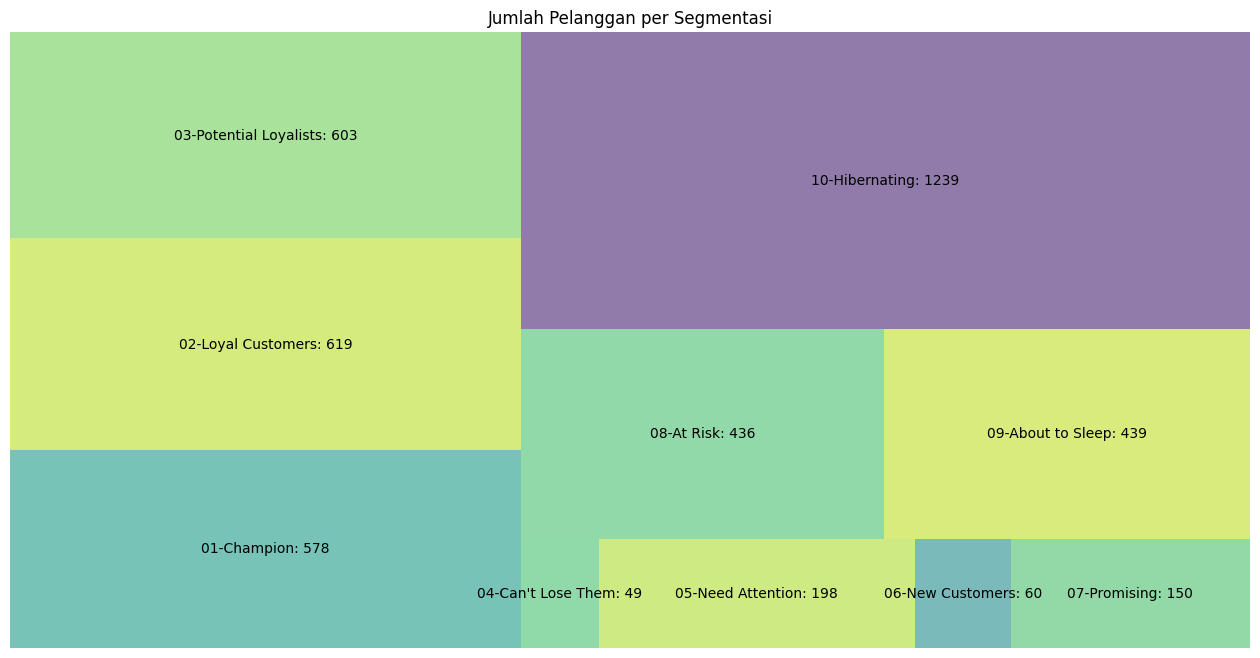

In [83]:
import squarify

# Menghitung jumlah pelanggan unik per segmen
customer_counts = summary['CustomerID']['nunique']

# Membuat label untuk setiap segmen
labels = [f'{segment}: {count}' for segment, count in customer_counts.items()]

# Membuat treemap chart
plt.figure(figsize=(16,8))
squarify.plot(sizes=customer_counts, label=labels, alpha=0.6)
plt.title('Jumlah Pelanggan per Segmentasi')
plt.axis('off')
plt.show()

# Insights & Recommendations

## Berdasarkan hasil analisis RFM Perusahaan, berikut adalah beberapa insight dan rekomendasi yang dapat diambil:

### Champion (578): Pelanggan ini adalah pelanggan terbaik Perusahaan yang baru-baru ini membeli, sering membeli, dan menghabiskan banyak. Perusahaan harus mengakui dan menghargai mereka. Perusahaan bisa memberikan mereka penawaran khusus atau produk eksklusif.

### Loyal Customers (619): Pelanggan ini sering membeli dan menghabiskan banyak. Perusahaan bisa membuat mereka merasa spesial dan memanfaatkan kekuatan mereka untuk membantu mempromosikan merek Perusahaan.

### Potential Loyalists (603): Pelanggan ini baru-baru ini membeli dan sering membeli. Perusahaan bisa melibatkan mereka dengan program loyalitas atau penawaran khusus untuk meningkatkan hubungan mereka dengan merek Perusahaan.

### Can’t Lose Them (49): Pelanggan ini menghabiskan banyak tetapi sudah lama tidak membeli. Perusahaan harus mencoba untuk membangun kembali hubungan dengan mereka melalui survei atau penawaran khusus.

### Need Attention (198): Pelanggan ini belum lama membeli dan memiliki frekuensi pembelian yang rendah. Perusahaan bisa meningkatkan interaksi dengan mereka melalui email pemasaran atau penawaran khusus.

### New Customers (60): Pelanggan ini baru-baru ini membeli tetapi belum sering membeli. Perusahaan bisa memberikan mereka pengalaman yang baik untuk mendorong pembelian berikutnya.

### Promising (150): Pelanggan ini baru-baru ini membeli tetapi belum sering membeli. Perusahaan bisa memberikan mereka pengalaman yang baik untuk mendorong pembelian berikutnya.

### At Risk (436): Pelanggan ini menghabiskan banyak tetapi sudah lama tidak membeli. Perusahaan harus mencoba untuk membangun kembali hubungan dengan mereka melalui survei atau penawaran khusus.

### About to Sleep (439): Pelanggan ini sudah lama tidak membeli dan memiliki frekuensi pembelian yang rendah. Perusahaan harus mencoba untuk membangun kembali hubungan dengan mereka melalui survei atau penawaran khusus.

### Hibernating (1239): Pelanggan ini sudah lama tidak membeli dan memiliki frekuensi pembelian yang rendah. Perusahaan harus mencoba untuk membangun kembali hubungan dengan mereka melalui survei atau penawaran khusus.

#### Pelanggan Terbaik: Perusahaan memiliki sejumlah besar pelanggan yang termasuk dalam kategori “Champion” dan “Loyal Customers”. Ini menunjukkan bahwa Perusahaan memiliki basis pelanggan yang kuat yang sering melakukan pembelian dan memberikan nilai moneter yang tinggi.
#### Pelanggan yang Berisiko: Ada sejumlah besar pelanggan dalam kategori “At Risk”, “About to Sleep”, dan “Hibernating”. Ini menunjukkan bahwa ada pelanggan yang sudah lama tidak melakukan pembelian dan/atau memiliki frekuensi pembelian yang rendah. Ini bisa menjadi tanda bahwa Perusahaan perlu meningkatkan upaya retensi dan keterlibatan pelanggan.
#### Pelanggan Baru dan Berpotensi: Perusahaan memiliki sejumlah pelanggan dalam kategori “New Customers” dan “Promising”. Ini adalah pelanggan yang baru-baru ini melakukan pembelian dan memiliki potensi untuk menjadi pelanggan yang loyal jika dikelola dengan baik.
#### Pelanggan yang Membutuhkan Perhatian: Ada sejumlah pelanggan dalam kategori “Need Attention”. Ini adalah pelanggan yang mungkin membutuhkan interaksi lebih lanjut untuk mendorong keterlibatan dan retensi.